# Diamond Price Prediction

## Demo website
[Diamond Price Prediction](https://diamond-price-predict.streamlit.app/) -  Built with Streamlit and deployed on Streamlit Cloud.

## Packages

In [1]:
import pandas as pd
import numpy as np

## Import datasets from Kaggle

This dataset is available on Kaggle at [Diamond Price Prediction](https://www.kaggle.com/datasets/natedir/diamonds).

In [2]:
diamond_df = pd.read_csv('data/diamonds.csv')

In [3]:
diamond_df.head(), diamond_df.shape

(   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
 0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
 1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
 2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
 3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
 4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   
 
       z  
 0  2.43  
 1  2.31  
 2  2.31  
 3  2.63  
 4  2.75  ,
 (53940, 11))

Eliminate the leftmost column, which is just an index.

In [4]:
diamond_df = diamond_df.drop(['Unnamed: 0'], axis=1)

## Data Exploration

### Print first few rows, shape, and data types

In [5]:
diamond_df.head(), diamond_df.shape, diamond_df.dtypes

(   carat      cut color clarity  depth  table  price     x     y     z
 0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
 1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
 2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
 3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
 4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75,
 (53940, 10),
 carat      float64
 cut         object
 color       object
 clarity     object
 depth      float64
 table      float64
 price        int64
 x          float64
 y          float64
 z          float64
 dtype: object)

### Use `describe()` to get summary statistics

In [6]:
diamond_df.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

# Print 7 histograms, with each title describe shortly the distribution style of the data (e.g. right-skewed, clustered,...)
diamond_df.hist(figsize=(20, 15));

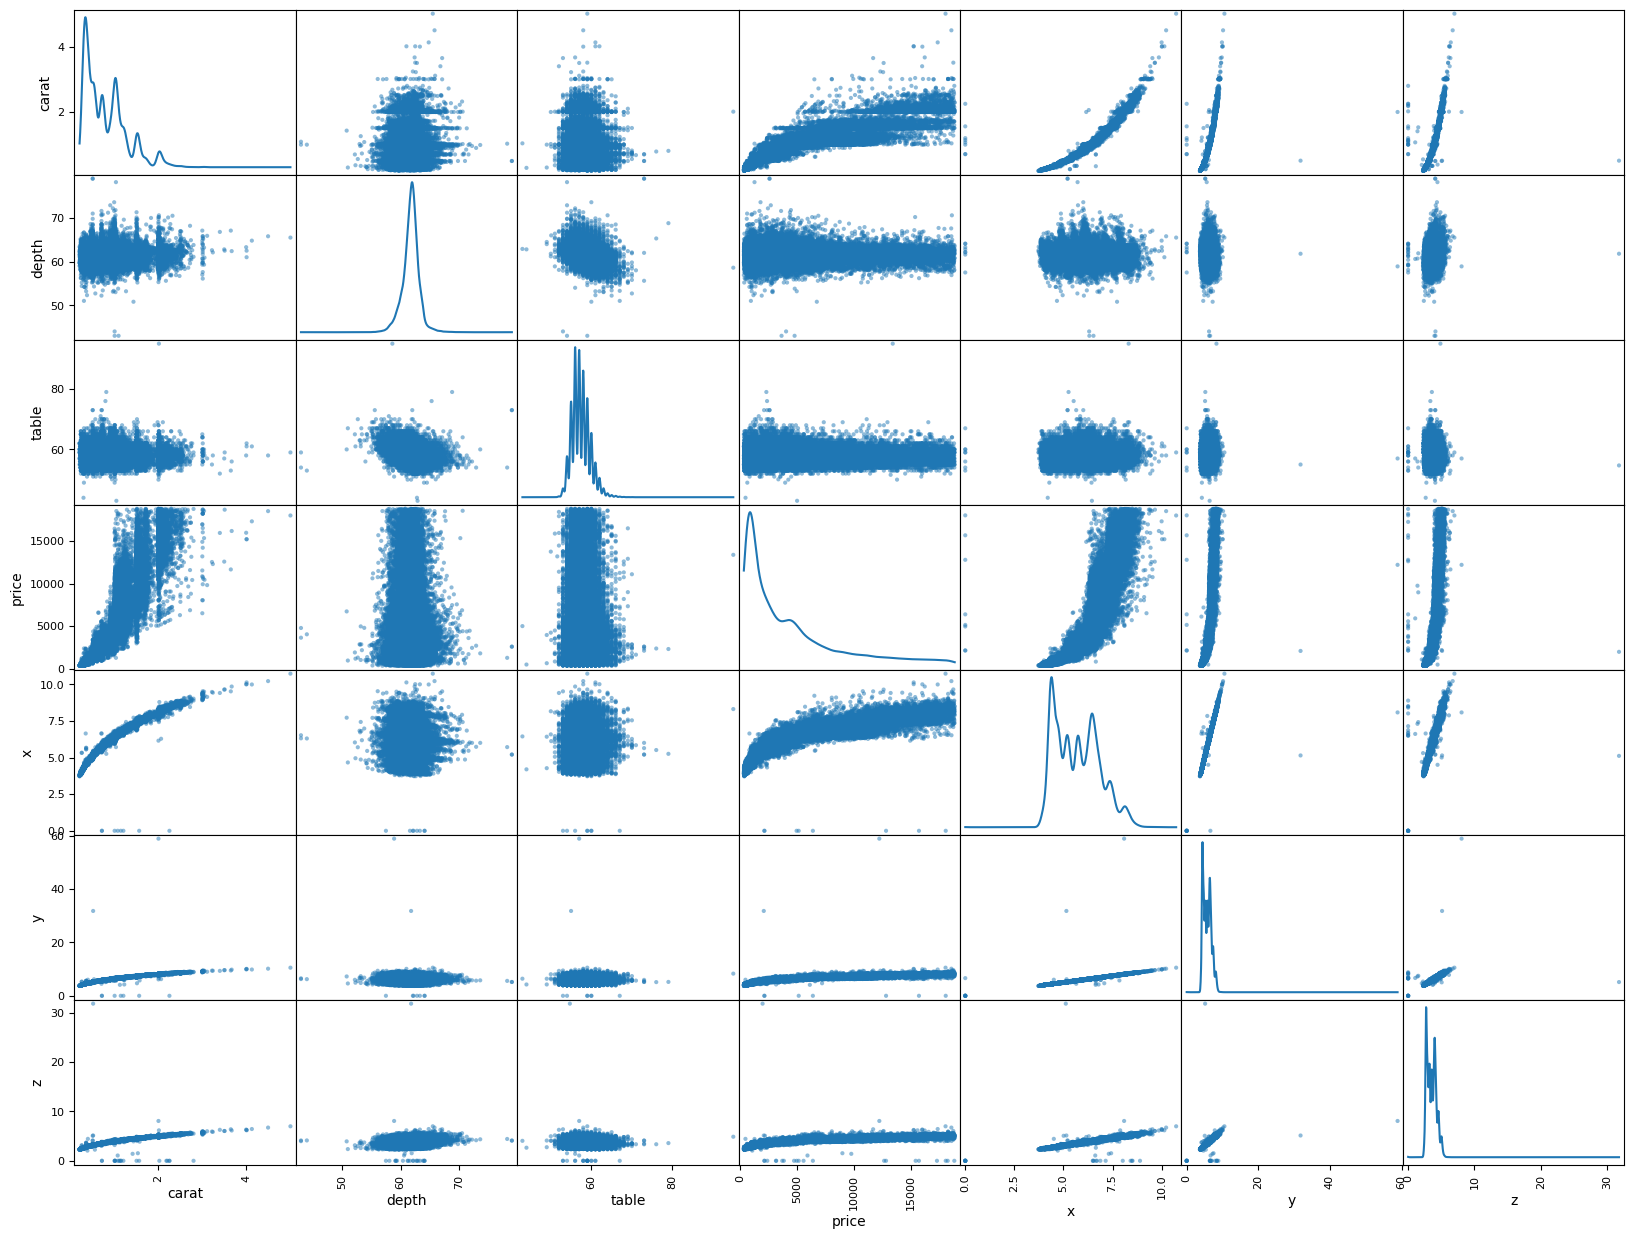

In [8]:
# The scatter matrix is a great way to visualize the relationships between multiple variables in a dataset.

from pandas.plotting import scatter_matrix
scatter_matrix(diamond_df, figsize=(20, 15), diagonal='kde');

## Data Preparation

### Manipulate categorical variables

In [9]:
diamond_df['cut'].unique(), diamond_df['color'].unique(), diamond_df['clarity'].unique()

(array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object),
 array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object),
 array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
       dtype=object))

In [10]:
color_mapping = {'J': 0, 'I': 1, 'H': 2, 'G': 3, 'F': 4, 'E': 5, 'D': 6}
diamond_df.color = diamond_df.color.map(color_mapping)

In [11]:
clarity_mapping = {'I1': 0, 'SI2': 1, 'SI1': 2, 'VS2': 3, 'VS1': 4, 'VVS2': 5, 'VVS1': 6, 'IF': 7}
diamond_df.clarity = diamond_df.clarity.map(clarity_mapping)

In [12]:
cut_mapping = {'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}
diamond_df.cut = diamond_df.cut.map(cut_mapping)

In [13]:
diamond_df.describe()

carat           cut         color       clarity         depth  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940      2.904097      3.405803      3.051020     61.749405   
std        0.474011      1.116600      1.701105      1.647136      1.432621   
min        0.200000      0.000000      0.000000      0.000000     43.000000   
25%        0.400000      2.000000      2.000000      2.000000     61.000000   
50%        0.700000      3.000000      3.000000      3.000000     61.800000   
75%        1.040000      4.000000      5.000000      4.000000     62.500000   
max        5.010000      4.000000      6.000000      7.000000     79.000000   

              table         price             x             y             z  
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000  
mean      57.457184   3932.799722      5.731157      5.734526      3.538734  
std        2.234491   3989.439738      1.121761      1.142135      0.705699  
min       43.000000    326.000000      0.000000      0.000000      0.000000  
25%       56.000000    950.000000      4.710000      4.720000      2.910000  
50%       57.000000   2401.000000      5.700000      5.710000      3.530000  
75%       59.000000   5324.250000      6.540000      6.540000      4.040000  
max       95.000000  18823.000000     10.740000     58.900000     31.800000

### Eliminate disturbing values

In [14]:
diamond_df = diamond_df.drop(diamond_df[diamond_df["x"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["y"]==0].index)
diamond_df = diamond_df.drop(diamond_df[diamond_df["z"]==0].index)

### Eliminate values that > 99% of the rest

In [15]:
diamond_df = diamond_df[diamond_df['depth'] < diamond_df['depth'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['table'] < diamond_df['table'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['x'] < diamond_df['x'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['y'] < diamond_df['y'].quantile(0.99)]
diamond_df = diamond_df[diamond_df['z'] < diamond_df['z'].quantile(0.99)]

In [16]:
diamond_df.head(10)

carat  cut  color  clarity  depth  table  price     x     y     z
0    0.23    4      5        1   61.5   55.0    326  3.95  3.98  2.43
1    0.21    3      5        2   59.8   61.0    326  3.89  3.84  2.31
3    0.29    3      1        3   62.4   58.0    334  4.20  4.23  2.63
4    0.31    1      0        1   63.3   58.0    335  4.34  4.35  2.75
5    0.24    2      0        5   62.8   57.0    336  3.94  3.96  2.48
6    0.24    2      1        6   62.3   57.0    336  3.95  3.98  2.47
7    0.26    2      2        2   61.9   55.0    337  4.07  4.11  2.53
8    0.22    0      5        3   65.1   61.0    337  3.87  3.78  2.49
9    0.23    2      2        4   59.4   61.0    338  4.00  4.05  2.39
10   0.30    1      0        2   64.0   55.0    339  4.25  4.28  2.73

In [17]:
diamond_df.describe()

carat           cut         color       clarity         depth  \
count  51130.000000  51130.000000  51130.000000  51130.000000  51130.000000   
mean       0.748505      2.965500      3.463974      3.117426     61.717375   
std        0.406608      1.060319      1.679777      1.640241      1.285391   
min        0.200000      0.000000      0.000000      0.000000     43.000000   
25%        0.390000      2.000000      2.000000      2.000000     61.100000   
50%        0.700000      3.000000      3.000000      3.000000     61.800000   
75%        1.020000      4.000000      5.000000      4.000000     62.500000   
max        2.070000      4.000000      6.000000      7.000000     65.500000   

              table         price             x             y             z  
count  51130.000000  51130.000000  51130.000000  51130.000000  51130.000000  
mean      57.349591   3561.244631      5.637999      5.641865      3.480219  
std        2.074312   3475.346374      1.035121      1.028587      0.637887  
min       43.000000    326.000000      3.730000      3.680000      1.070000  
25%       56.000000    921.000000      4.680000      4.690000      2.890000  
50%       57.000000   2273.000000      5.640000      5.650000      3.480000  
75%       59.000000   4997.000000      6.480000      6.480000      4.010000  
max       63.500000  18806.000000      8.300000      8.150000      5.000000

In [18]:
X = diamond_df.drop(['price'], axis=1)
y = diamond_df['price']

In [19]:
X = X.to_numpy()
y = y.to_numpy()

In [20]:
X.shape, y.shape

((51130, 9), (51130,))

### Data for Training and Testing

Split dataset into 80% training and 20% testing.

In [21]:
X_train = X[:int(X.shape[0]*0.8)]
y_train = y[:int(X.shape[0]*0.8)]
X_test = X[int(X.shape[0]*0.8):]
y_test = y[int(X.shape[0]*0.8):]

Normailize the data by subtracting the mean and dividing by the standard deviation.

In [22]:
xmean = np.mean(X_train, axis=0)
xstd = np.std(X_train, axis=0)
X_train = (X_train - xmean) / xstd
X_test = (X_test - xmean) / xstd

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40904, 9), (10226, 9), (40904,), (10226,))

Tranpose the data so that each row is a feature and each column is an example.

In [24]:
X_train = np.hstack([np.ones((X_train.shape[0], 1)), X_train])
X_test = np.hstack([np.ones((X_test.shape[0], 1)), X_test])

In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((40904, 10), (10226, 10), (40904,), (10226,))

## Modeling

### Linear Regression Model

In [26]:
N = X_train.shape[0]
n_epochs = 1000
m = 1000
learning_rate = 0.001

# No explicit bias term; the first column of X_* is ones to learn the intercept via W
theta = np.random.randn(10, 1)
losses = []

### Training

In [27]:
for epoch in range(n_epochs):
    for i in range(0, N, m):
        # Take a batch of data
        X_batch = X_train[i:i+m, :]
        y_batch = y_train[i:i+m].reshape(-1, 1)
        
        # Predict y_hat
        y_hat = X_batch @ theta
        
        # Compute loss
        loss = np.mean((y_hat - y_batch) ** 2)
        losses.append(loss)
        
        # Compute gradient
        gradient = 2 * X_batch.T @ (y_hat - y_batch)
        
        # Update weights
        theta -= learning_rate * (gradient / m)
        
    if (epoch + 1) % 50 == 0:
        print(f"Epoch {epoch + 1}/{n_epochs} - Loss: {losses[-1]}")

Epoch 50/1000 - Loss: 854690.2804881446
Epoch 100/1000 - Loss: 930888.7918352446
Epoch 150/1000 - Loss: 898086.575709949
Epoch 200/1000 - Loss: 865824.0643924325
Epoch 250/1000 - Loss: 837644.0411158183
Epoch 300/1000 - Loss: 813149.890785892
Epoch 350/1000 - Loss: 791850.0374682825
Epoch 400/1000 - Loss: 773313.9451640927
Epoch 450/1000 - Loss: 757169.9685266428
Epoch 500/1000 - Loss: 743097.4184975234
Epoch 550/1000 - Loss: 730819.5034467353
Epoch 600/1000 - Loss: 720097.2515056593
Epoch 650/1000 - Loss: 710724.2800891658
Epoch 700/1000 - Loss: 702522.2935133729
Epoch 750/1000 - Loss: 695337.2069441539
Epoch 800/1000 - Loss: 689035.8092394451
Epoch 850/1000 - Loss: 683502.8894749393
Epoch 900/1000 - Loss: 678638.7624560278
Epoch 950/1000 - Loss: 674357.1375643822
Epoch 1000/1000 - Loss: 670583.2830677389


In [28]:
# Validate the model, compute MSE on the test set
y_hat_test = X_test @ theta
test_loss_mse = np.mean((y_test - y_hat_test) ** 2)
print(f"Test MSE: {test_loss_mse}")

Test MSE: 1537577.661748432


In [29]:
# MAE
test_loss_mae = np.mean(np.abs(y_test - y_hat_test))
print(f"Test MAE: {test_loss_mae}")

Test MAE: 955.1460419805663


In [30]:
# Save the model parameters
np.savez(
    'weight.npz',
    x_mean=xmean,
    x_std=xstd,
    theta=theta
)

In [31]:
# Save the training and testing data
np.savez('data.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)